## 3.11 模型选择、欠拟合和过拟合

### 3.11.4 多项式函数拟合实验

In [1]:
import d2lzh as d2l
import keras
import keras.backend as K
import numpy as np

Using TensorFlow backend.


#### 3.11.4.1 生成数据集

y = 1.2x - 3.4x^2 + 5.6x^3 + 5 + e
其中噪声项e服从均值0、标准差为0.1的正态分布

In [2]:
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5
features = np.random.normal(size=(n_train + n_test, 1))
poly_features = np.concatenate((features, np.power(features, 2), np.power(features, 3)), axis=1)
labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1]
          + true_w[2] * poly_features[:, 2] + true_b)
labels += np.random.normal(scale=0.1, size=labels.shape)

In [3]:
features[:2], poly_features[:2], labels[:2]

(array([[ 2.29757312],
        [-2.5038319 ]]), array([[  2.29757312,   5.27884225,  12.12852605],
        [ -2.5038319 ,   6.26917417, -15.69695825]]), array([  57.74613015, -107.3833147 ]))

#### 3.11.4.2 定义、训练和测试模型

In [4]:
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None,
             legend=None, figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)
        

In [5]:
num_epochs = 100

def l2_loss(y_true, y_pred):
    return K.square(y_true - y_pred)

class LossCallback(keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.train_ls, self.test_ls = [], []
        
    def on_epoch_end(self, batch, logs=None):
        self.train_ls.append(logs.get('loss'))
        self.test_ls.append(logs.get('val_loss'))
        
def fit_and_plot(train_features, test_features, train_labels, test_labels):
    model = keras.Sequential([
        keras.layers.Dense(1)
    ])
    model.compile(optimizer='sgd', loss=l2_loss)
    batch_size = min(10, train_labels.shape[0])
    cb = LossCallback()
    model.fit(train_features, train_labels, batch_size=batch_size, epochs=num_epochs, 
              validation_data=(test_features , test_labels),
              callbacks=[cb])
    print('final epoch: train loss', cb.train_ls[-1], 'test loss', cb.test_ls[-1])
    print(len(cb.train_ls), len(cb.test_ls))
    semilogy(range(1, num_epochs + 1), cb.train_ls, 'epochs', 'loss',
             range(1, num_epochs + 1), cb.test_ls, ['train', 'test'])
    print('weight:', model.get_weights())
    

#### 3.11.4.3. 三阶多项式函数拟合（正常）

Train on 100 samples, validate on 100 samples
Epoch 1/100
100/100 [==============================] - 0s 460us/step - loss: 167.3202 - val_loss: 25.1531
Epoch 2/100
100/100 [==============================] - 0s 128us/step - loss: 19.6653 - val_loss: 19.4420
Epoch 3/100
100/100 [==============================] - 0s 143us/step - loss: 14.5986 - val_loss: 14.2491
Epoch 4/100
100/100 [==============================] - 0s 172us/step - loss: 11.5201 - val_loss: 11.0096
Epoch 5/100
100/100 [==============================] - 0s 168us/step - loss: 8.5089 - val_loss: 9.5899
Epoch 6/100
100/100 [==============================] - 0s 192us/step - loss: 7.0852 - val_loss: 8.4269
Epoch 7/100
100/100 [==============================] - 0s 156us/step - loss: 5.6294 - val_loss: 5.4962
Epoch 8/100
100/100 [==============================] - 0s 158us/step - loss: 4.7566 - val_loss: 4.2042
Epoch 9/100
100/100 [==============================] - 0s 166us/step - loss: 3.8887 - val_loss: 3.4268
Epoch 10/100
100/1

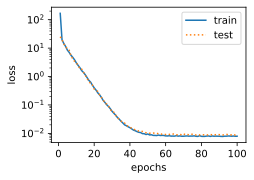

In [6]:
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :],
             labels[:n_train], labels[n_train:])

#### 3.11.4.4. 线性函数拟合（欠拟合）

Train on 100 samples, validate on 100 samples
Epoch 1/100
100/100 [==============================] - 0s 484us/step - loss: 330.2232 - val_loss: 503.2351
Epoch 2/100
100/100 [==============================] - 0s 166us/step - loss: 257.1459 - val_loss: 431.9708
Epoch 3/100
100/100 [==============================] - 0s 172us/step - loss: 208.4920 - val_loss: 380.3963
Epoch 4/100
100/100 [==============================] - 0s 170us/step - loss: 174.6549 - val_loss: 343.9824
Epoch 5/100
100/100 [==============================] - 0s 173us/step - loss: 152.9774 - val_loss: 317.8080
Epoch 6/100
100/100 [==============================] - 0s 188us/step - loss: 138.4409 - val_loss: 299.9624
Epoch 7/100
100/100 [==============================] - 0s 187us/step - loss: 128.0613 - val_loss: 286.4725
Epoch 8/100
100/100 [==============================] - 0s 167us/step - loss: 121.2025 - val_loss: 276.0713
Epoch 9/100
100/100 [==============================] - 0s 151us/step - loss: 116.6514 - val_loss: 

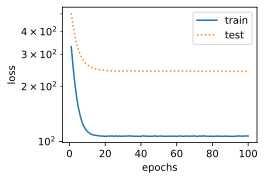

In [7]:
fit_and_plot(features[:n_train, :], features[n_train:, :], 
             labels[:n_train], labels[n_train:])

#### 3.11.4.5. 训练样本不足（过拟合）

Train on 2 samples, validate on 100 samples
Epoch 1/100
2/2 [==============================] - 0s 25ms/step - loss: 5868.8232 - val_loss: 3612.1146
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 53784.8633 - val_loss: 34590.8098
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 511652.3750 - val_loss: 328674.8915
Epoch 4/100
2/2 [==============================] - 0s 14ms/step - loss: 4869607.5000 - val_loss: 3128262.5697
Epoch 5/100
2/2 [==============================] - 0s 14ms/step - loss: 46346344.0000 - val_loss: 29772913.6419
Epoch 6/100
2/2 [==============================] - 0s 13ms/step - loss: 441100032.0000 - val_loss: 283361911.8066
Epoch 7/100
2/2 [==============================] - 0s 16ms/step - loss: 4198157312.0000 - val_loss: 2696892127.5041
Epoch 8/100
2/2 [==============================] - 0s 17ms/step - loss: 39955845120.0000 - val_loss: 25667579867.1655
Epoch 9/100
2/2 [==============================] - 0s 15ms/step - lo

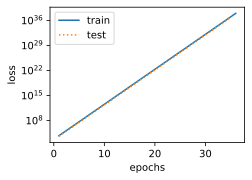

In [8]:
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :], labels[0:2],
             labels[n_train:])